In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('vg_sales_data.csv')

In [38]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
#Shape of the dataset
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f"Number of rows in dataform: {num_rows}")
print(f"Number of columns in dataform: {num_cols}")

Number of rows in dataform: 16598
Number of columns in dataform: 11


In [40]:
#Information about columns of the element
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        16598 non-null  int64  
 1   Name                        16598 non-null  object 
 2   Platform                    16598 non-null  object 
 3   Year                        16327 non-null  float64
 4   Genre                       16598 non-null  object 
 5   Publisher                   16540 non-null  object 
 6   NA_Sales (in millions)      16598 non-null  float64
 7   EU_Sales (in millions)      16598 non-null  float64
 8   JP_Sales (in millions)      16598 non-null  float64
 9   Other_Sales (in millions)   16598 non-null  float64
 10  Global_Sales (in millions)  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [41]:
#Stastistical Description of Numerical Data
df.describe()

,Rank,Year,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<h2>Checking for Nulls and Duplicates</h2>

In [42]:
df.isnull().sum()   #for checking null values

Rank                            0
Name                            0
Platform                        0
Year                          271
Genre                           0
Publisher                      58
NA_Sales (in millions)          0
EU_Sales (in millions)          0
JP_Sales (in millions)          0
Other_Sales (in millions)       0
Global_Sales (in millions)      0
dtype: int64

In [43]:
df.duplicated().sum()   # to check duplicate values

0

In [44]:
# Checking for duplicate rank
df["Rank"].duplicated().sum()

0

<h3>Crucial Insights from Statistical Description</h3>
<ul>
<li>The video games range from year 1980 - 2020.</li>
<li>There are missing values in 'Year' column.</li>
<li>The rank starts from 1 and ends 16600. (There might be a missing rank as count is 16598)</li>

Data Cleaning

In [45]:
# Drop all rows with null values
df.dropna(axis=0, inplace=True)

In [46]:
#Check new shape of dataset after removing nulls
df.shape

(16291, 11)

In [47]:
df['Name'].nunique()

11325

The dataset contains 16291 rows but there exixsts only 11325 unique names. This suggests possible duplicate values exists in our data.

In [48]:
df[['Name','Year']].duplicated().sum()

4196

In [49]:
#Removing duplicate none entries (since all names should be unique
df.drop_duplicates(subset='Name', keep='first',inplace=True)

In [50]:
df.shape

(11325, 11)

In [51]:
#Checking for Alphabetic data in Numeric columns
df[['NA_Sales (in millions)','EU_Sales (in millions)','JP_Sales (in millions)','Other_Sales (in millions)','Global_Sales (in millions)']].applymap(np.isreal).all()

C:\Users\AAKASH KUMAR\AppData\Local\Temp\ipykernel_11480\4023481547.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['NA_Sales (in millions)','EU_Sales (in millions)','JP_Sales (in millions)','Other_Sales (in millions)','Global_Sales (in millions)']].applymap(np.isreal).all()


NA_Sales (in millions)        True
EU_Sales (in millions)        True
JP_Sales (in millions)        True
Other_Sales (in millions)     True
Global_Sales (in millions)    True
dtype: bool

In [52]:
# Glimpse of the clean Dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Data Visualisation

In [53]:
# Creating list of numeric columns with year excluded
numeric_cols = df.select_dtypes(include=['Float64']).columns.to_list()[1:]
numeric_cols                                                                                              

['NA_Sales (in millions)',
 'EU_Sales (in millions)',
 'JP_Sales (in millions)',
 'Other_Sales (in millions)',
 'Global_Sales (in millions)']

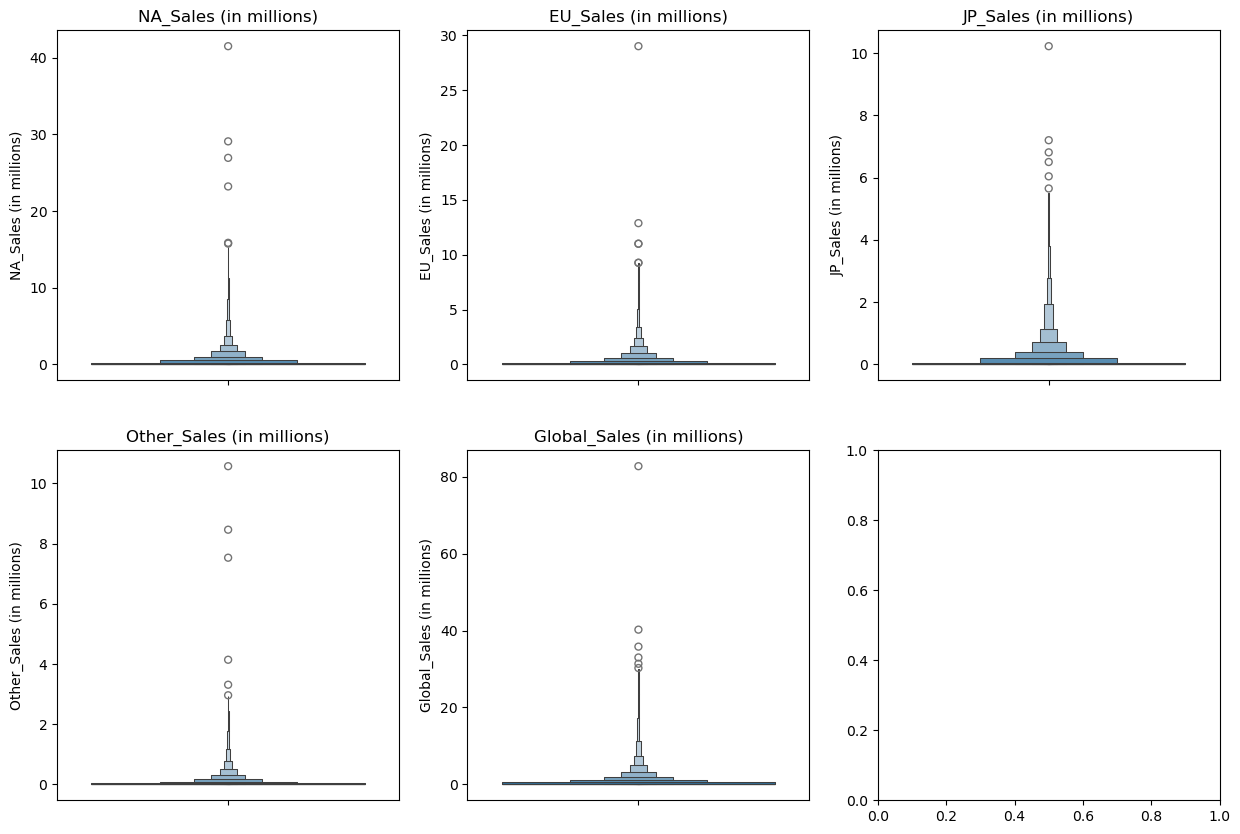

In [54]:
#Distribution of sales data
fig, axes = plt.subplots(2,3, figsize=(15,10))
colors = []
n = 0
for i in range(2):
    for j in range(3):
        if n>4:
            break
        sns.boxenplot(df[numeric_cols[n]], fill=True, ax=axes[i,j])
        axes[i,j].set_title(f"{numeric_cols[n]}")
        n+=1
plt.show()

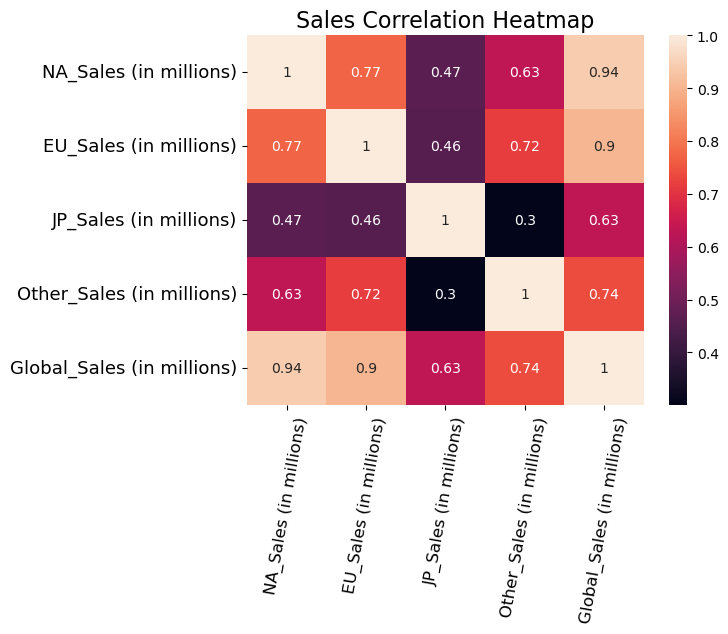

In [55]:
sns.heatmap(df[numeric_cols].corr(numeric_only=True), annot=True)
plt.title("Sales Correlation Heatmap", fontdict={'size':16})
plt.xticks(rotation=80, size=12)
plt.yticks(rotation=00, size=13)
plt.show()

<h1>What are the Top 10 Game Publications Globally?</h1>

In [56]:
#Publisher with highest  sales in NA region
top10_publish = df.groupby('Publisher')['Global_Sales (in millions)'].sum().sort_values(ascending=False)[:10]

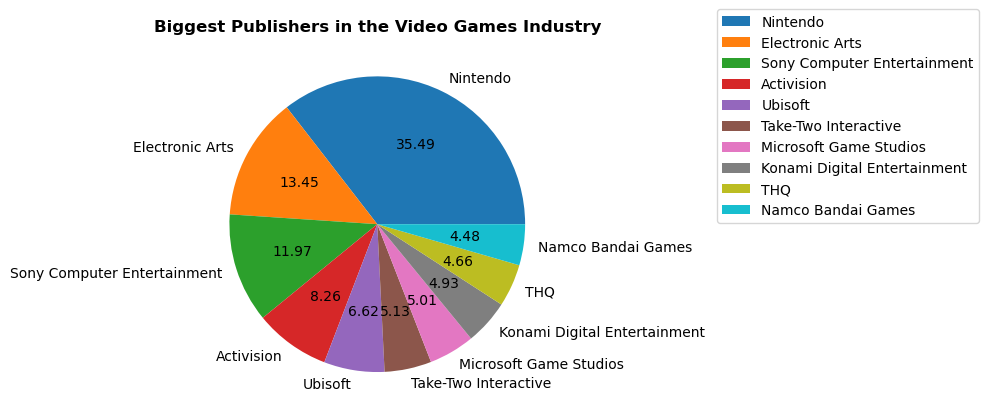

In [57]:
plt.pie(top10_publish.values, labels= top10_publish.index, autopct="%.2f")
plt.title("Biggest Publishers in the Video Games Industry", fontdict={'weight':'bold'})
plt.legend(bbox_to_anchor=(1.4, 1.1))
plt.show()

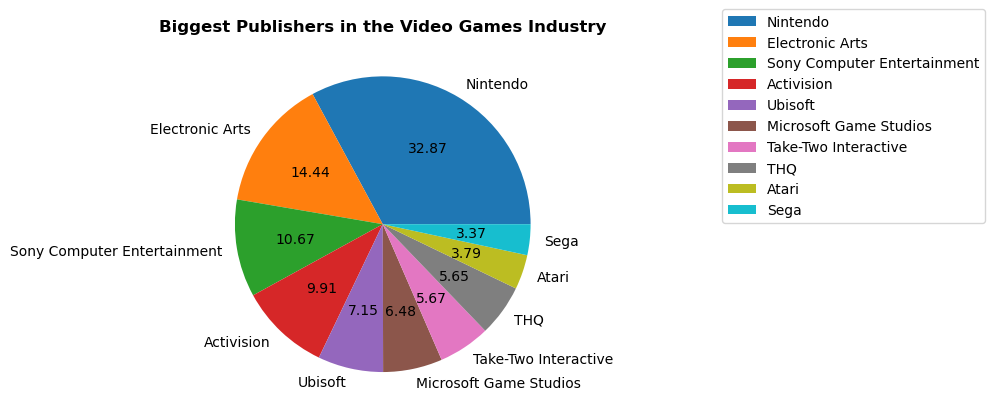

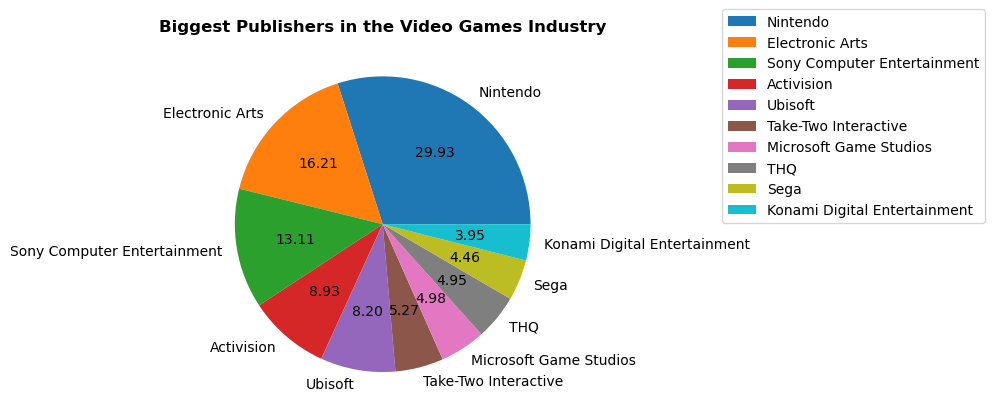

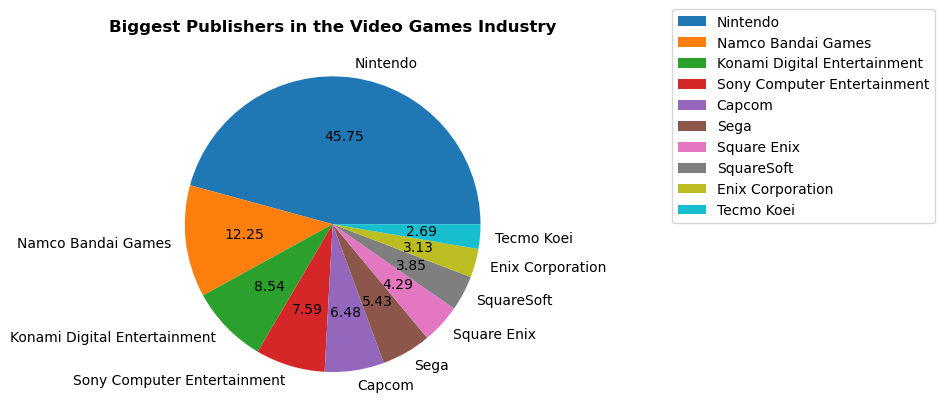

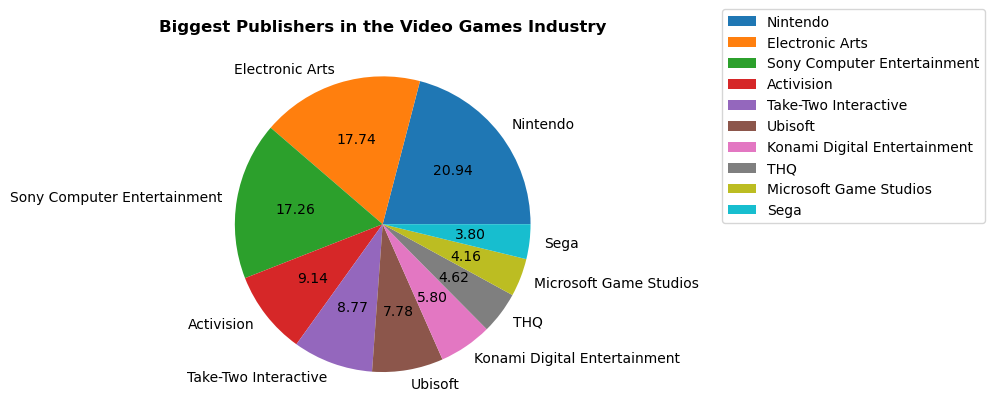

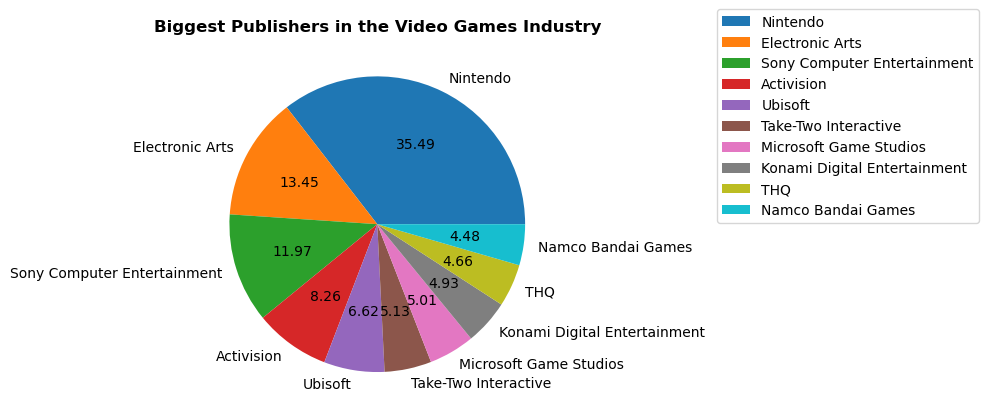

In [58]:
for i in numeric_cols:
    top10_publish = df.groupby('Publisher')[i].sum().sort_values(ascending=False)[:10]
    plt.pie(top10_publish.values, labels= top10_publish.index, autopct="%.2f")
    plt.title("Biggest Publishers in the Video Games Industry", fontdict={'weight':'bold'})
    plt.legend(bbox_to_anchor=(1.4, 1.1))
    plt.show()

Which publication has released the most number of games?

In [59]:
top10_numofgames = df['Publisher'].value_counts().sort_values(ascending=False)[:10]

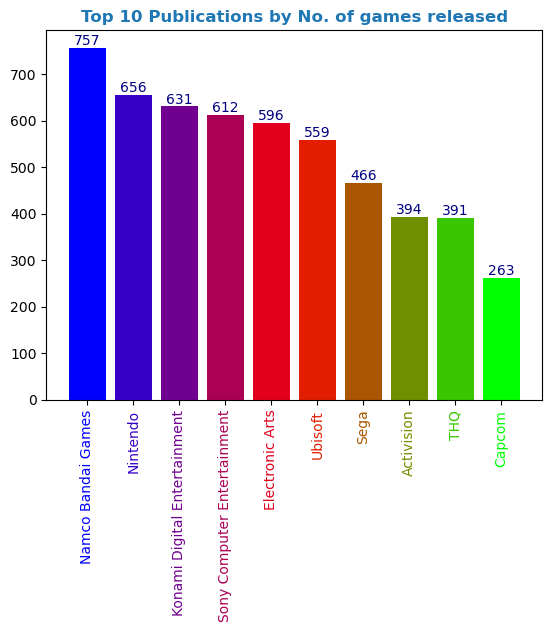

In [60]:
colors = plt.cm.brg(np.linspace(0,1,len(top10_numofgames.index)))
bars = plt.bar(top10_numofgames.index, top10_numofgames.values, color=colors)
plt.xticks(rotation=90)
ax = plt.gca() # Get the current axes
xtics = ax.get_xticklabels()
for tick, color in zip(xtics, colors):
    tick.set_color(color)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
            ha='center', va='bottom', fontsize=10, color='navy')
plt.title("Top 10 Publications by No. of games released", fontdict={'weight':'bold'}, color="tab:blue")
plt.show()

Which Video Game had the most sales?

In [61]:
top_10_vg = df.sort_values(by='Global_Sales (in millions)', ascending=False)[:10]

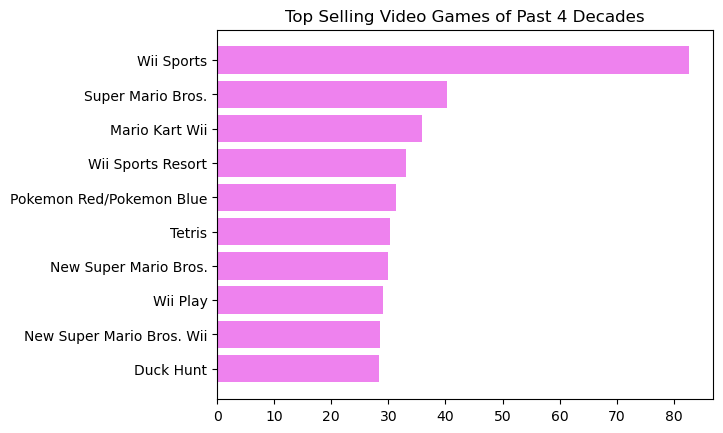

In [62]:
plt.barh(top_10_vg['Name'].values[::-1], top_10_vg['Global_Sales (in millions)'].values[::-1], color='Violet')
plt.title("Top Selling Video Games of Past 4 Decades")
plt.show()

Most Succesful Game of Each Year (Creation Year)

In [63]:
best_each_year = df.loc[df.groupby('Year')['Global_Sales (in millions)'].idxmax()]
best_each_year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


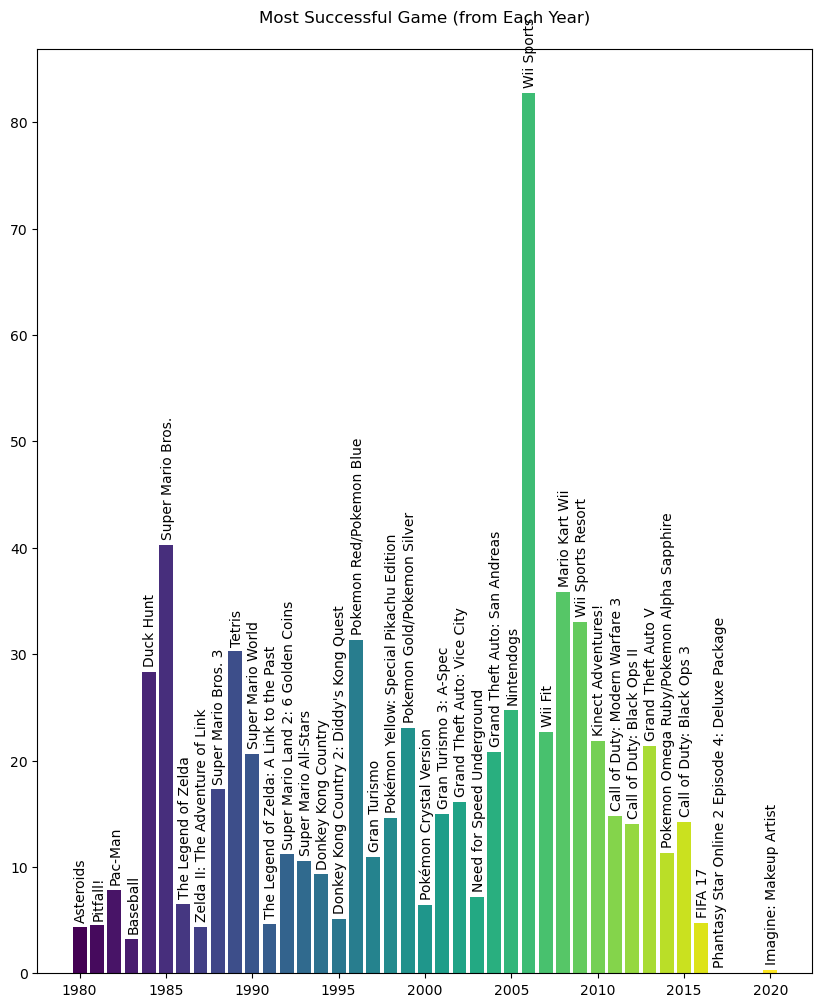

In [64]:
colors = plt.cm.viridis(np.linspace(0, 1, len(best_each_year['Year'].values)))
plt.figure(figsize=(10,12))
bars = plt.bar(best_each_year['Year'].values,best_each_year['Global_Sales (in millions)'].values, color=colors)
n = 0
for bar in bars:
    x = bar.get_x()
    y = bar.get_height()
    plt.text(x+0.5, y+0.5, best_each_year['Name'].values[n], ha='center', va='bottom', rotation=90)
    n+=1
plt.title("Most Successful Game (from Each Year)", pad=20)
plt.show()

Viseo Games by Genre

In [65]:
games_genre = df['Genre'].value_counts()

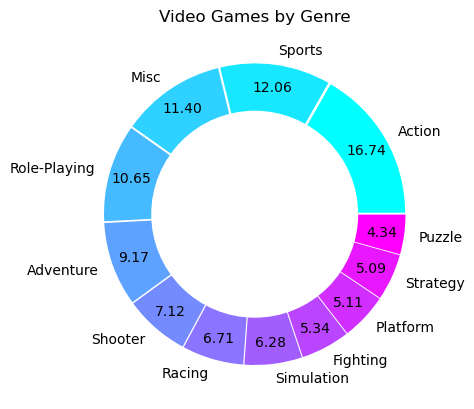

In [66]:
colors = plt.cm.cool(np.linspace(0, 1, len(games_genre.index)))
explode=tuple(0.02 for i in range(12))
plt.pie(games_genre.values, labels=games_genre.index, autopct='%.2f', colors= colors,pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()   #Get Current Figure
fig.gca().add_artist(centre_circle) #Get current access
plt.title("Video Games by Genre")
plt.show()

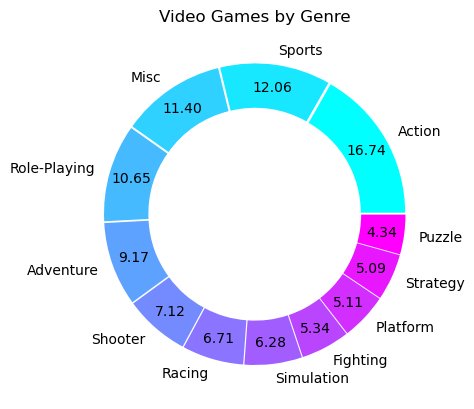

In [68]:
colors = plt.cm.cool(np.linspace(0, 1, len(games_genre.index)))
explode=tuple(0.02 for i in range(12))
plt.pie(games_genre.values, labels=games_genre.index, autopct='%.2f', colors= colors,pctdistance=0.85, explode=explode, 
        wedgeprops={'width':0.3})
#centre_circle = plt.Circle((0,0), 0.70, fc='white')
#fig = plt.gcf()   #Get Current Figure
#fig.gca().add_artist(centre_circle) #Get current access
plt.title("Video Games by Genre")
plt.show()

In [69]:
explode

(0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

In [70]:
#Top 5 best selling genres
sales_genre = df.groupby('Genre')['Global_Sales (in millions)'].sum().sort_values(ascending=False)
sales_genre

Genre
Action          1135.45
Sports           941.86
Role-Playing     810.17
Shooter          708.81
Platform         704.76
Misc             644.50
Racing           589.14
Fighting         349.51
Simulation       346.67
Puzzle           219.03
Adventure        199.47
Strategy         160.30
Name: Global_Sales (in millions), dtype: float64

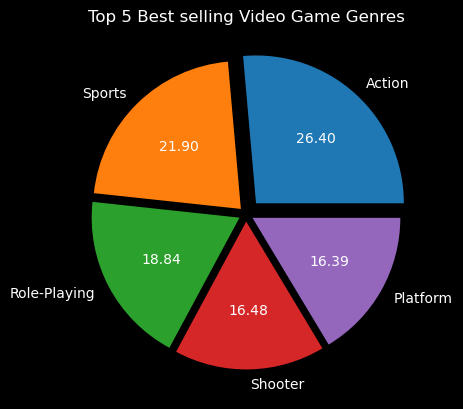

In [79]:
explode=(0.10, 0.05, 0.05, 0.05, 0.05)
fig = plt.figure()
#fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
plt.pie(sales_genre.values[:5], labels=sales_genre.index[:5], autopct='%.2f', explode=explode, textprops={'color':'white'})
plt.title("Top 5 Best selling Video Game Genres", color='white')
plt.show()

<h2>Conclusions</h2>

1. Wii Sports is the top seller in the gaming industry with 82.74 million copies sold.
2. Nintendo is the world's leading publisher.
3. PS2 is the most used gaming device(platform).
4. Action is the most preferred genre among gamers (accumulating 26% of the total sales.)

In [2]:
i = 1
while True:
    if i%3 == 0:

        break
    print(i)

    i += 1

1
2


In [3]:
min(max(False, -3,-4), 2, 7)

False